PERFILAMIENTO DE DATOS

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Se cargan los datos. 
df_original = pd.read_csv('202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8', index_col = 0, na_values=['-','ABC','nan','?'])
df_customers = df_original.copy()
df_customers.head(5)

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2.0,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2.0,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2.0,Single,34.0,7.0,1.0,3.0,4.0
4,40496.0,50000.0,Female,2.0,Married,37.0,5.0,1.0,1.0,NaN
5,47437.0,50000.0,Male,2.0,Married,57.0,6.0,0.0,12.0,3.0


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             658 non-null    float64
 1   Limit_bal            659 non-null    float64
 2   Sex                  659 non-null    object 
 3   Education            658 non-null    float64
 4   Marriage             657 non-null    object 
 5   Age                  659 non-null    float64
 6   Total_Credit_Cards   658 non-null    float64
 7   Total_visits_bank    656 non-null    float64
 8   Total_visits_online  659 non-null    float64
 9   Total_calls_made     658 non-null    float64
dtypes: float64(8), object(2)
memory usage: 56.7+ KB


In [4]:
#Se dividen las columnas entre numéricas y no numéricas
df_num = df_customers.select_dtypes(include = ['int','float']).copy()
df_no_num = df_customers.select_dtypes(include = ['object']).copy()

In [5]:
df_num.describe()

,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,658.000000,659.000000,658.000000,659.000000,6.580000e+02,656.00000,659.000000,658.000000
mean,55180.056231,170000.000000,1.781155,95.218513,1.876290e+05,2.41311,2.602428,3.579027
std,25651.348197,129739.041329,0.778797,1432.660847,4.812847e+06,1.63130,2.936469,2.868076
min,11265.000000,10000.000000,1.000000,21.000000,1.000000e+00,0.00000,0.000000,0.000000
25%,33875.500000,50000.000000,1.000000,28.000000,3.000000e+00,1.00000,1.000000,1.000000
50%,53907.000000,140000.000000,2.000000,33.000000,5.000000e+00,2.00000,2.000000,3.000000
75%,77321.500000,240000.000000,2.000000,41.000000,6.000000e+00,4.00000,4.000000,5.000000
max,99843.000000,630000.000000,6.000000,36745.000000,1.234568e+08,5.00000,15.000000,10.000000


In [6]:
#Tiene sentido pasar ambos datos a numéricos porque es información que puede ayudar a la orientación del Marketing del banco
df_no_num.describe()

,Sex,Marriage
count,659,657
unique,9,6
top,Female,Single
freq,372,379


In [7]:
df_no_num['Sex'].value_counts()

Female    372
Male      273
M           3
Mael        3
F           3
f           2
Femael      1
9           1
Fmale       1
Name: Sex, dtype: int64

In [8]:
#Se debe agrupar todos los datos mal digitados (f, Femael, Mael, etc.) con los que están bien. Además, 
#eliminar el registro que tiene "9" como género. Sólo es un registro y no es útil clasificarlo como un grupo aparte.
df_no_num= df_no_num.drop(df_no_num[df_no_num['Sex'] == '9'].index)
df_no_num['Sex'].replace(to_replace = ['M','Mael','Male'], value = 'Males', inplace = True)
df_no_num['Sex'].replace(to_replace = ['Female','F','f','Fmale','Femael'], value = 'Females', inplace = True)

In [9]:
df_no_num['Sex'].value_counts()

Females    379
Males      276
M            3
Name: Sex, dtype: int64

In [10]:
df_no_num['Marriage'].value_counts()

Single     378
Married    260
Others       9
1            5
2            3
0            1
Name: Marriage, dtype: int64

In [11]:
df_no_num['Marriage'].replace(to_replace = ['1','2','0','Others'], value = 'O', inplace = True)

In [12]:
#Se convierten en variables numéricos
df_marriage = df_no_num[['Marriage']].copy()
encoder = OneHotEncoder().fit(df_marriage)
print(encoder.categories_)

[array(['Married', 'O', 'Single', nan], dtype=object)]


In [13]:
df_marriage = pd.DataFrame(encoder.transform(df_marriage).toarray(), 
                       columns = np.concatenate(encoder.categories_)) 

In [14]:
df_marriage.head(-10)

,Married,O,Single,NaN
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
644,0.0,0.0,1.0,0.0
645,1.0,0.0,0.0,0.0
646,0.0,0.0,1.0,0.0
647,1.0,0.0,0.0,0.0


In [15]:
#Para simplicidad, se escogerán solamente las columnas Married y Single que son las que más datos poseen y se pueden
#generalizar mejor para el marketing.
df_marriage= df_marriage[['Married','Single']].copy()
df_marriage.head(5)

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [16]:
df_sex = df_no_num[['Sex']].copy()
encoder = OneHotEncoder().fit(df_sex)
print(encoder.categories_)

[array(['Females', 'M ', 'Males', nan], dtype=object)]


In [17]:
df_sex = pd.DataFrame(encoder.transform(df_sex).toarray(), 
                       columns = np.concatenate(encoder.categories_)) 

In [18]:
df_sex.head(-10)

,Females,M,Males,NaN
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
644,0.0,0.0,1.0,0.0
645,0.0,0.0,1.0,0.0
646,1.0,0.0,0.0,0.0
647,1.0,0.0,0.0,0.0


In [19]:
#Para simplicidad, se escogerán solamente las columnas Females y Males que son las que más datos poseen y se pueden
#generalizar mejor para el marketing.
df_sex= df_sex[['Females','Males']].copy()
df_sex.head(5)

,Females,Males
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [20]:
#Ahora, los datos transformados se unen a los numéricos
df = pd.concat((df_sex, df_marriage, df_num), axis=1)
df

,Females,Males,Married,Single,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,1.0,87073.0,20000.0,2.0,24.0,2.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,38414.0,120000.0,2.0,26.0,3.0,0.0,10.0,9.0
3,1.0,0.0,1.0,0.0,17341.0,90000.0,2.0,34.0,7.0,1.0,3.0,4.0
4,0.0,1.0,1.0,0.0,40496.0,50000.0,2.0,37.0,5.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
656,1.0,0.0,0.0,1.0,51108.0,280000.0,2.0,39.0,10.0,1.0,10.0,0.0
657,1.0,0.0,0.0,1.0,60732.0,290000.0,3.0,27.0,10.0,1.0,13.0,2.0
658,1.0,0.0,0.0,1.0,53834.0,190000.0,1.0,28.0,8.0,1.0,9.0,1.0
659,NaN,NaN,NaN,NaN,80655.0,80000.0,1.0,23.0,10.0,1.0,15.0,0.0


In [21]:
df.describe()

,Females,Males,Married,Single,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,659.000000,659.000000,659.000000,659.000000,658.000000,659.000000,658.000000,659.000000,6.580000e+02,656.00000,659.000000,658.000000
mean,0.575114,0.418816,0.394537,0.573596,55180.056231,170000.000000,1.781155,95.218513,1.876290e+05,2.41311,2.602428,3.579027
std,0.494701,0.493740,0.489122,0.494930,25651.348197,129739.041329,0.778797,1432.660847,4.812847e+06,1.63130,2.936469,2.868076
min,0.000000,0.000000,0.000000,0.000000,11265.000000,10000.000000,1.000000,21.000000,1.000000e+00,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,33875.500000,50000.000000,1.000000,28.000000,3.000000e+00,1.00000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,53907.000000,140000.000000,2.000000,33.000000,5.000000e+00,2.00000,2.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,77321.500000,240000.000000,2.000000,41.000000,6.000000e+00,4.00000,4.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,99843.000000,630000.000000,6.000000,36745.000000,1.234568e+08,5.00000,15.000000,10.000000


In [22]:
#El máximo de Age y Total_Credit_Cards no tiene sentido. No pueden haber personas con 36745 años. Esto puede dañar el DataFrame
agenosense = df[df['Age']>50]
agenosense

,Females,Males,Married,Single,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
5,0.0,1.0,0.0,1.0,47437.0,50000.0,2.0,57.0,6.0,0.0,12.0,3.0
12,1.0,0.0,0.0,1.0,NaN,260000.0,1.0,51.0,3.0,NaN,2.0,7.0
34,0.0,1.0,0.0,0.0,61517.0,500000.0,2.0,54.0,1.0,0.0,5.0,6.0
35,0.0,1.0,0.0,1.0,28254.0,500000.0,1.0,58.0,4.0,1.0,3.0,10.0
43,1.0,0.0,1.0,0.0,52363.0,10000.0,2.0,2202.0,4.0,2.0,3.0,4.0
47,1.0,0.0,0.0,0.0,83326.0,20000.0,1.0,36745.0,1.0,2.0,2.0,5.0
51,1.0,0.0,0.0,0.0,51182.0,70000.0,3.0,789.0,1.0,0.0,5.0,9.0
65,0.0,1.0,1.0,0.0,61355.0,130000.0,2.0,51.0,1.0,0.0,5.0,9.0
66,0.0,1.0,1.0,0.0,60403.0,200000.0,1.0,57.0,1.0,1.0,4.0,4.0
67,1.0,0.0,0.0,1.0,85868.0,10000.0,2.0,56.0,2.0,0.0,3.0,6.0


In [23]:
cardsnosense = df[df['Total_Credit_Cards']>10]
cardsnosense

,Females,Males,Married,Single,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
75,0.0,1.0,0.0,1.0,33187.0,340000.0,1.0,32.0,123456789.0,0.0,5.0,8.0


In [24]:
#Se ve que hay edades de 2202, 36745 y 789 que deberían ser eliminadas. Asimismo, se puede ver que el máximo valor coherente de Age es 75.
#De igual manera, debe ser borrado el registro de 123456789 tarjetas de crédito. 
#Se borrarán las edades mayores a 75.
df.drop(df.loc[df['Age']>75].index, inplace=True)
#Registro de tarjetas de crédito sin sentido
df.drop(df.loc[df['Total_Credit_Cards']==123456789].index, inplace=True)

In [25]:
#Mediana de cada columna
df.median().to_dict()

{'Females': 1.0,
 'Males': 0.0,
 'Married': 0.0,
 'Single': 1.0,
 'Customer': 53924.0,
 'Limit_bal': 140000.0,
 'Education': 2.0,
 'Age': 33.0,
 'Total_Credit_Cards': 5.0,
 'Total_visits_bank': 2.0,
 'Total_visits_online': 2.0,
 'Total_calls_made': 3.0}

In [26]:
#Para tratar los nulos, se reemplazarán por la mediana (promedio no para evitar análisis con los outliers). Esto se 
#hará debido a que, como se puede apreciar, no hay una columna en específico que tenga la mayor parte de sus datos en 
#nulos. Por tanto, no podemos borrar ninguna columna como estrategia para tratar los nulos.
df.fillna(df.median().to_dict(), inplace = True)
df.isna().sum()

Females                0
Males                  0
Married                0
Single                 0
Customer               0
Limit_bal              0
Education              0
Age                    0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [27]:
#Reescalar los datos. Hay algunos datos incoherentes, como en Age que el máximo es 36745 y en el total de tarjetas de crédito
#que el máximo es 1.234568e+08; ninguno de estos datos tienen sentido.
trans = MinMaxScaler()
trans.fit(df)

df = pd.DataFrame(trans.transform(df), columns = df.columns)
df.describe()

,Females,Males,Married,Single,Customer,Limit_bal,Education,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.575342,0.418569,0.394216,0.576865,0.495725,0.258506,0.156469,0.260725,0.414510,0.483714,0.172907,0.355860
std,0.494668,0.493700,0.489054,0.494433,0.289377,0.208767,0.155366,0.173306,0.239634,0.324967,0.195867,0.285685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.256565,0.080645,0.000000,0.129630,0.222222,0.200000,0.066667,0.100000
50%,1.000000,0.000000,0.000000,1.000000,0.481598,0.209677,0.200000,0.222222,0.444444,0.400000,0.133333,0.300000
75%,1.000000,1.000000,1.000000,1.000000,0.743729,0.370968,0.200000,0.370370,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Evaluación hiperparámetros K-Means

In [28]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 n_init=10,
                 max_iter=300,
                 random_state=seed)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

C:\Users\yasmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


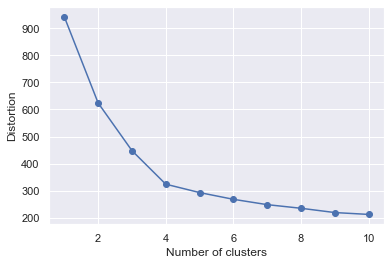

In [29]:
#Se evidencia que el codo son 4 clústers
plot_distortion(df)

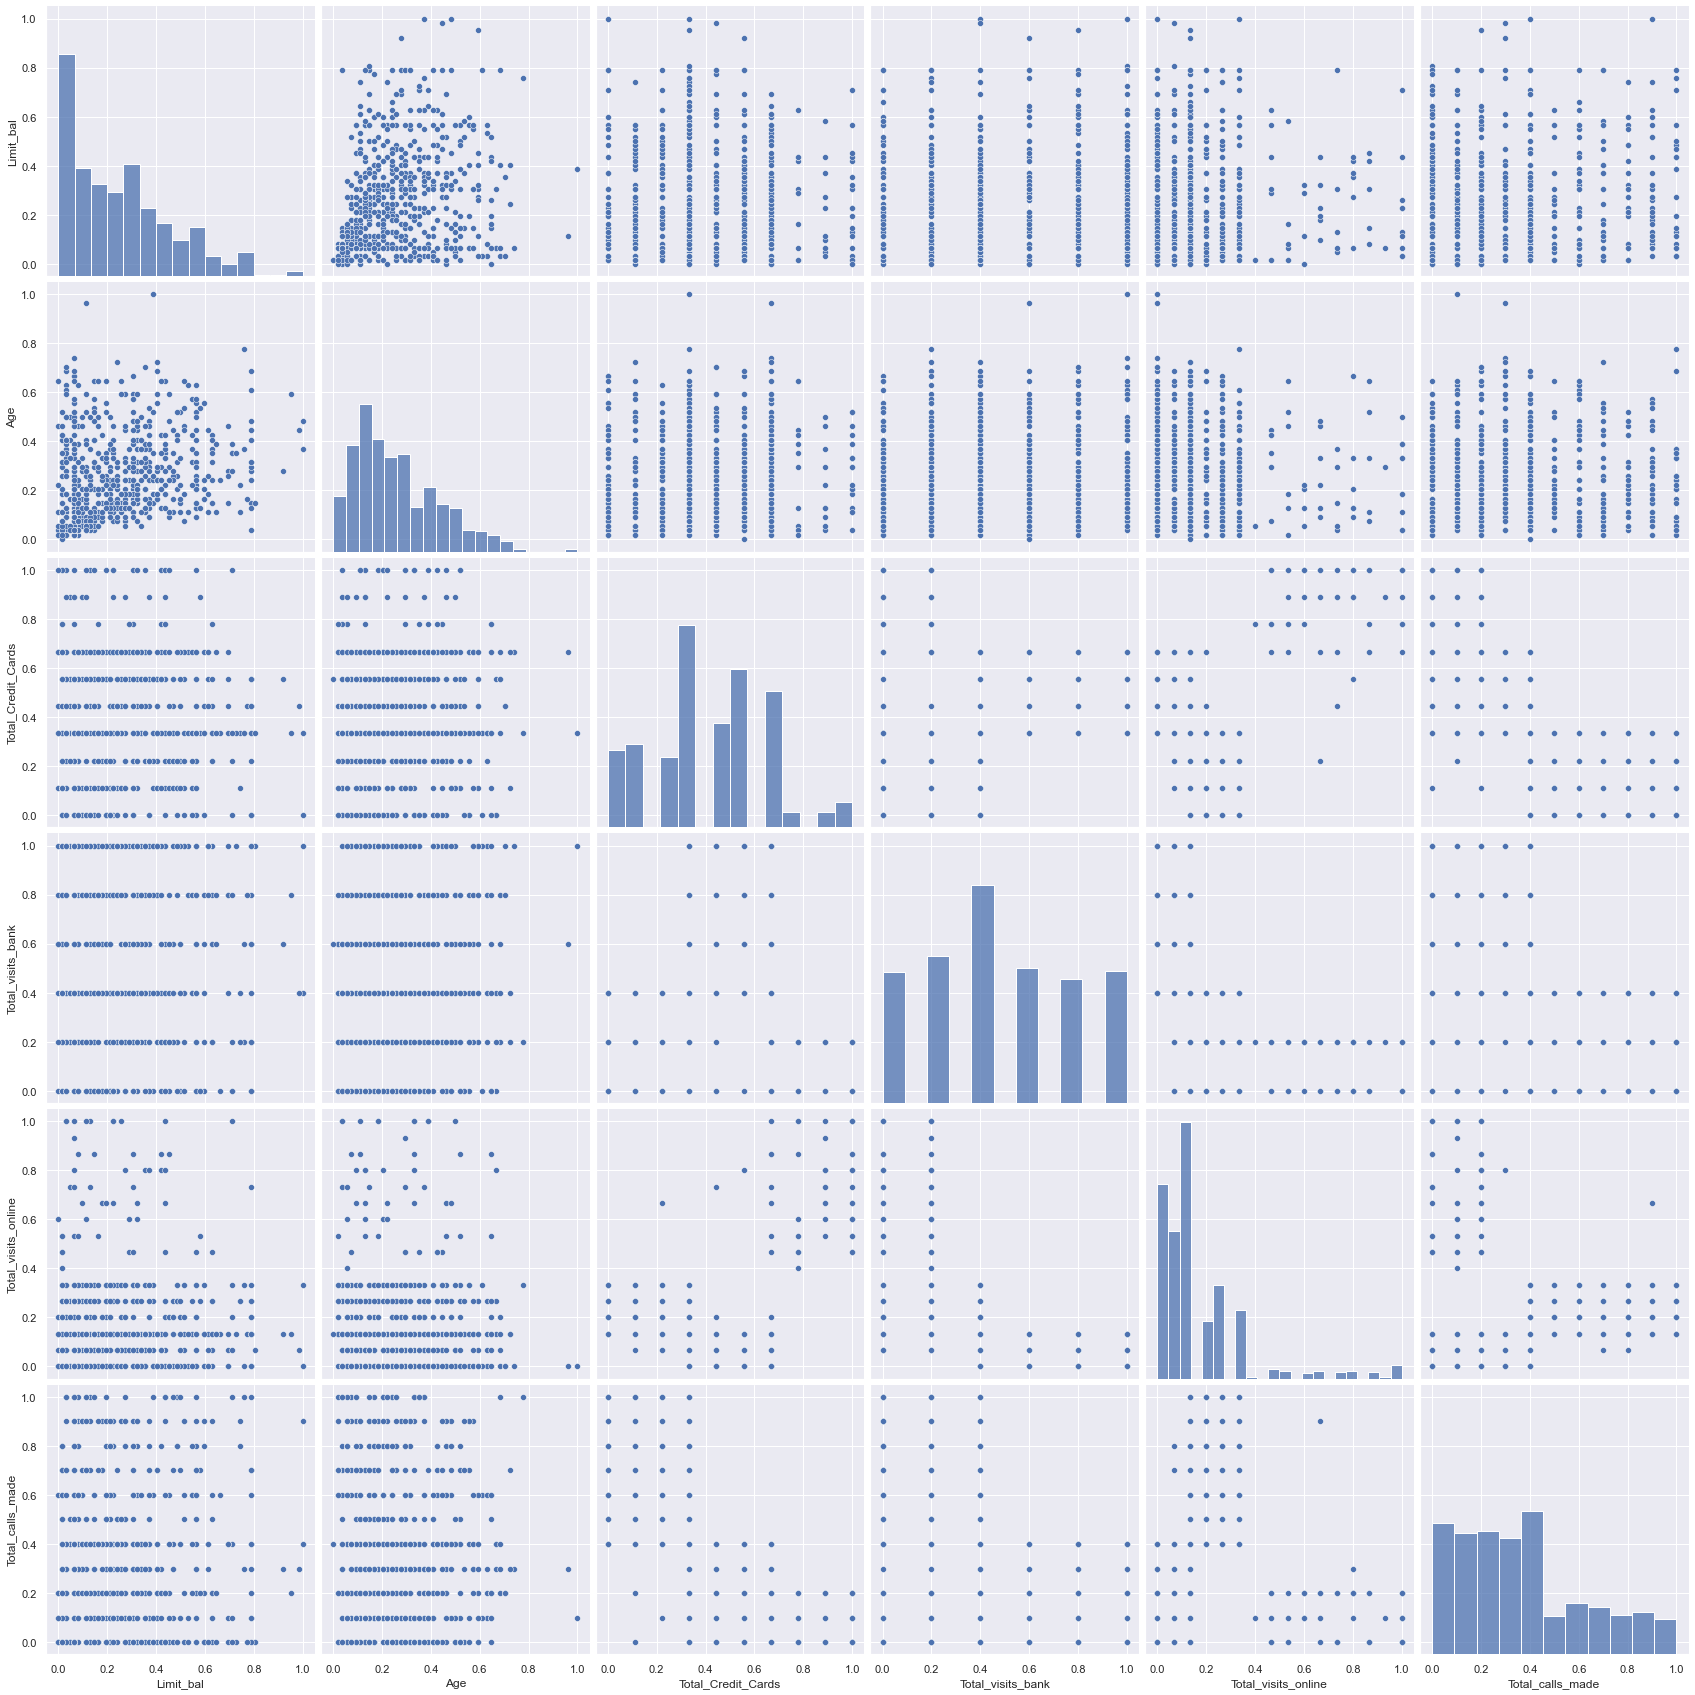

In [30]:
#Basándonos en estas gráficas, la mejor opción para la segmentación son las columnas Age, Limit_bal, Total_Credits_Cards, 
#Total_visits_bank,Total_visits_online y Total_calls_made
#Se apartan esas columnas de las demás
selected_cols = ['Limit_bal','Age','Total_Credit_Cards',
          'Total_visits_bank','Total_visits_online','Total_calls_made']
sns.pairplot(df, height=4,vars=selected_cols,kind='scatter')

In [31]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

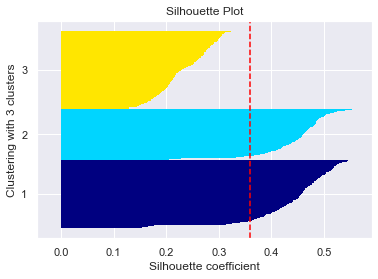

In [32]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=seed)
km.fit(df)
plot_silhouette(data = df, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

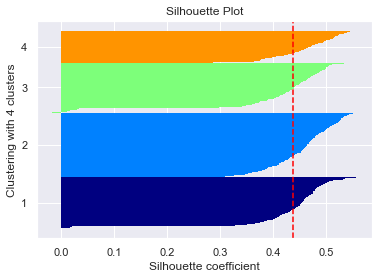

In [33]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=seed)
km.fit(df)
plot_silhouette(data = df, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

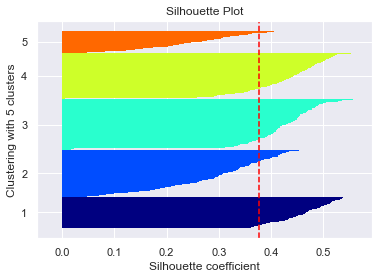

In [34]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=seed)
km.fit(df)
plot_silhouette(data = df, 
                labels = km.labels_, 
                ylabel = f'Clustering with {n_clusters} clusters')

In [35]:
#Se evidencia que el mejor número de clústers es 4 porque no tiene elementos mal asignados (con coeficiente menor a 0) y tiene el promedio de 
#coeficiente de Silhouette más alto.
#Visualizamos los prototipos
n_clusters = 4
km = KMeans(n_clusters=n_clusters, random_state=seed)
km.fit(df)
# Crea los prototipos
df_pro = pd.DataFrame(np.transpose(km.cluster_centers_), columns = range(1, n_clusters +1))
df_pro['column'] = df.columns
df_pro

,1,2,3,4,column
0,-1.110223e-16,1.000000e+00,9.819277e-01,-3.330669e-16,Females
1,9.941176e-01,6.661338e-16,3.885781e-16,1.000000e+00,Males
2,-1.665335e-16,-2.220446e-16,9.216867e-01,1.000000e+00,Married
3,9.647059e-01,1.000000e+00,0.000000e+00,-2.220446e-16,Single
4,4.589546e-01,5.134987e-01,5.207550e-01,4.794481e-01,Customer
5,2.360531e-01,2.567142e-01,2.792460e-01,2.656726e-01,Limit_bal
6,1.752941e-01,1.497674e-01,1.433735e-01,1.603774e-01,Education
7,2.655773e-01,2.602929e-01,2.438643e-01,2.802236e-01,Age
8,3.725490e-01,4.439276e-01,4.190094e-01,4.150943e-01,Total_Credit_Cards
9,4.529412e-01,5.004651e-01,4.831325e-01,5.000000e-01,Total_visits_bank


<AxesSubplot:xlabel='value', ylabel='column'>

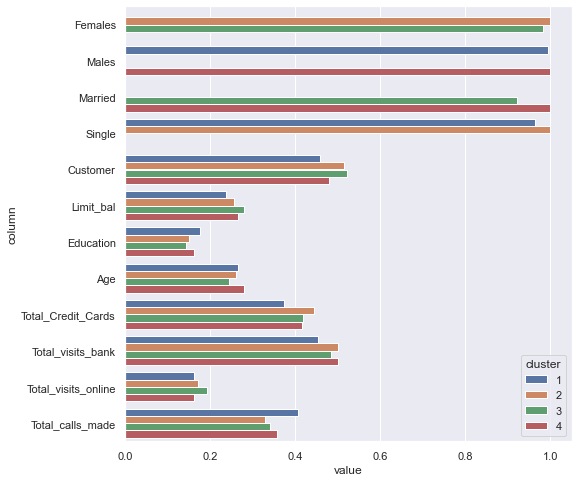

In [36]:
#Queremos saber cuáles columnas definen mejor los clústers. Por la gráfica se puede ver que Age, Limit_bal, Total_Credit_Cards, Total_visits_bank,
# y Total_calls_made son importantes a la hora de crear los cuatro CLÚSTERS.
resp = []
for i in range(1, n_clusters +1):
    df1 = df_pro[['column',i]].rename(columns = {i:'value'})
    df1['cluster'] = i
    resp.append(df1)

df_plot = pd.concat(resp, ignore_index = True)


fig = plt.figure(figsize=(8,8))
sns.barplot(data = df_plot, y = 'column', x = 'value', hue = 'cluster', orient = 'h')

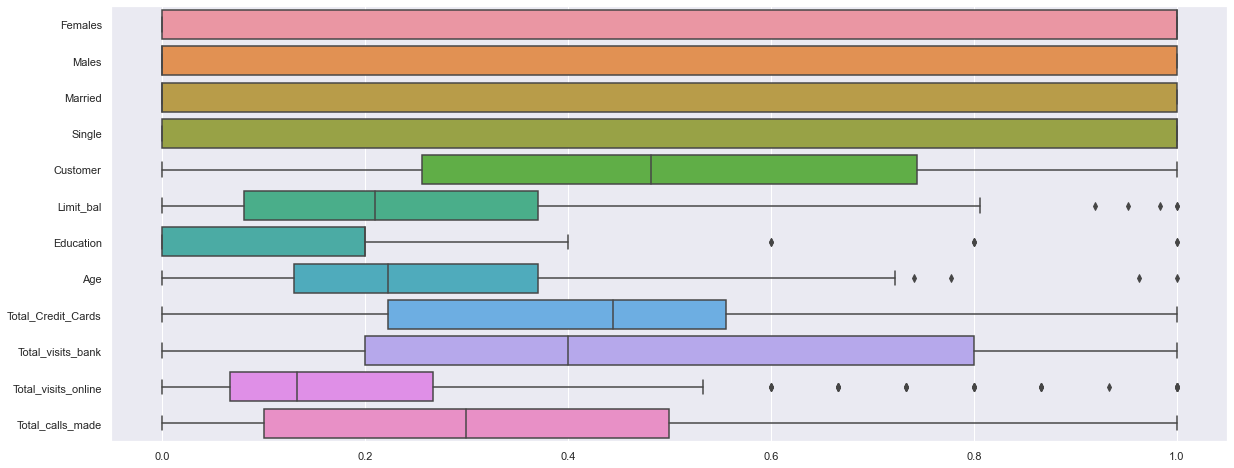

In [37]:
#Columnas con más outliers. Aunque sea Total_visits_online junto a Age, estos outliers no representan un peligro para los datos. Esto debido a que 
#si se pueden dar casos de clientes los cuales visiten constantemente el portal web del banco por diferentes situaciones (revisión de transacciones,
#cambios de contraseña, etc.) o. para Age, el caso en que un cliente sea longevo. No sería buena práctica quitarlos. Sí sería buena práctica quitar 
#outliers de Limit_bal, puesto que estos datos atípicos sí pueden estar dañando el análisis de datos porque es extraño que a una persona se le permita
#obtener más dinero de las tarjetas de crédito. En caso de que así sea, se evaluarían esos clientes en un clúster aparte. Por tanto, es mejor quitarlos
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="h")

In [38]:
#Se quitan los outliers de Limit_bal
df.drop(df.loc[df['Limit_bal']>0.82].index, inplace=True)

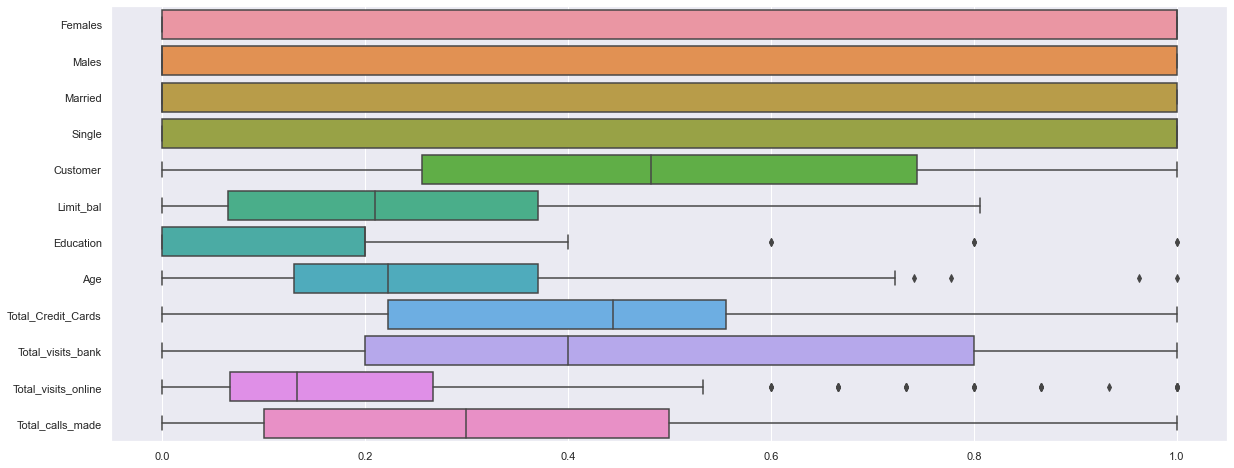

In [39]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="h")

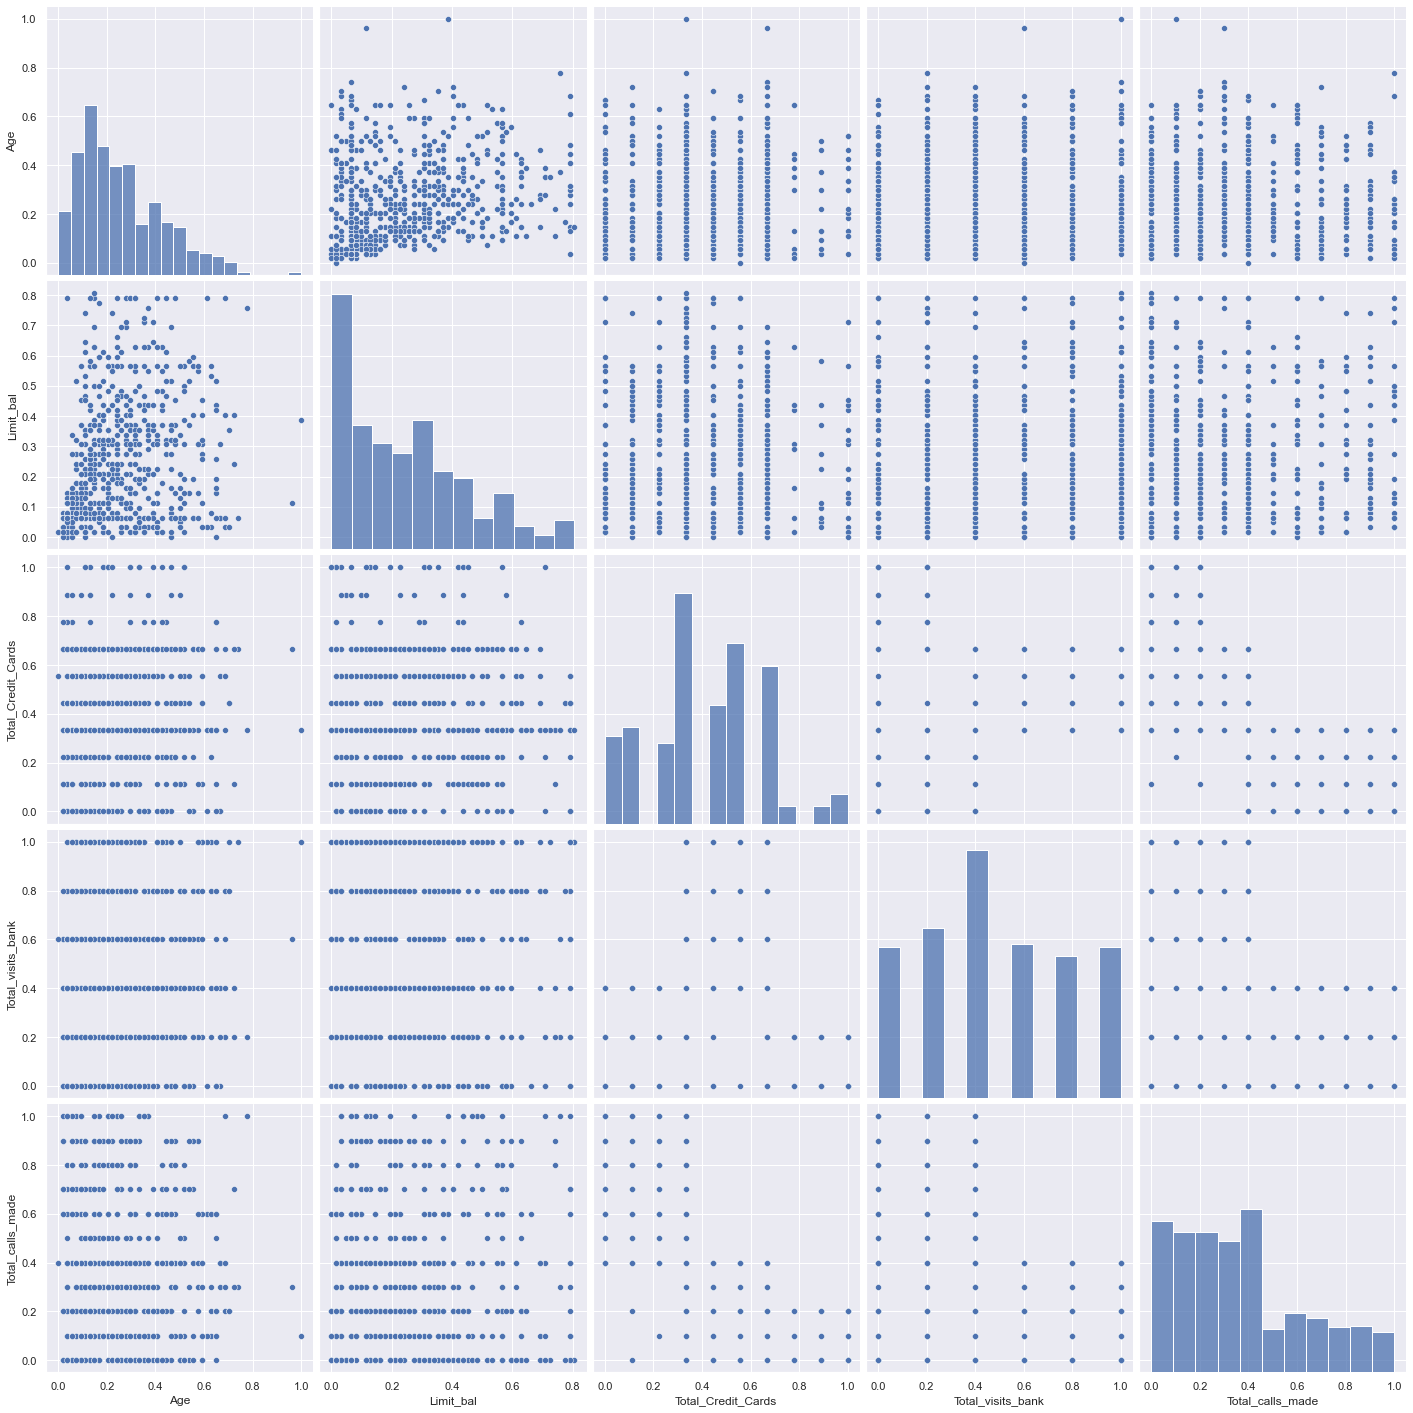

In [40]:
#Ahora, se quiere ver el comportamiento de las columnas que mejor definen los clústers.
selected_cols = ['Age', 'Limit_bal', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_calls_made']
sns.pairplot(df, height=4,vars=selected_cols,kind='scatter')

K-MEANS 

In [41]:
#Las columnas que más prometen para generar clústers son Age y Limit_bal. Entonces hacemos el K-Means con esas dos
# Construimos un nuevo modelo
selected_cols2 = ['Age', 'Limit_bal']
kmeans2 = KMeans(n_clusters=4, random_state=seed) 
kmeans2 = kmeans2.fit(df[selected_cols2])

<AxesSubplot:xlabel='Age', ylabel='Limit_bal'>

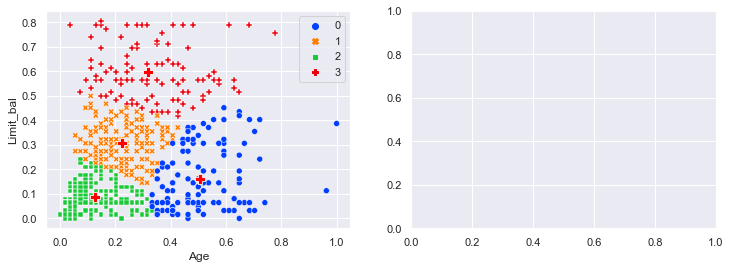

In [42]:
#Visualizamos el resultado
#fig = plt.figure(figsize=(6,6))
fig, axes = plt.subplots(1, 2, figsize = (12,4))

ax = axes[0]
sns.scatterplot(data = df, x = selected_cols[0],y = selected_cols2[1], 
                 hue = kmeans2.labels_, style = kmeans2.labels_, palette = 'bright', ax = ax)

sns.scatterplot(x = kmeans2.cluster_centers_[:,0], 
                y = kmeans2.cluster_centers_[:,1], 
                color = 'red',
                s = 100,
                marker = 'P',                
                ax = ax)

In [43]:
# Crea los prototipos
#Nos convencemos que la diferencia en los clústers la da la columna Age.la edad siempre tiene una influencia considerable en cada clúster, Siempre 
#tiene mayor diferencia.
df_prototype = pd.DataFrame(kmeans2.cluster_centers_, columns = selected_cols2)
df_prototype

,Age,Limit_bal
0,0.507652,0.160091
1,0.224868,0.305854
2,0.127931,0.089379
3,0.317765,0.595918


In [44]:
# Los reconstruimos. Queremos saber los valores no reescalados de los prototipos.
# Incluimos las columnas viejas
for col in df.columns:
    if col not in df_prototype.columns:
        df_prototype[col] = None
        
# Ordena
df_prototype = df_prototype[df.columns]

# Devuelve la transformacion
values = trans.inverse_transform(df_prototype)
df_prototype = pd.DataFrame(values, columns = df_prototype.columns)

# Imprime
df_prototype[selected_cols2]

,Age,Limit_bal
0,48.413223,109256.198347
1,33.142857,199629.629630
2,27.908297,65414.847162
3,38.159292,379469.026549
